In [ ]:
import plotly.graph_objects as go
import plotly.offline as pyo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#data = pd.read_csv("/Data/FCD/datap1.csv",sep=",") 
#data = pd.read_csv("C:/Users/ESTEBAN/Documents/Scripts_U/git/scripts/Data/FCD/limpia.csv", sep = ",")
data = pd.read_csv("/home/_init_/Documentos/Scripts/GIT/scripts/Data/FCD/limpia.csv",sep=",") 

In [101]:
##Limpieza 
#Identificamos cuartiles y mediana
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df

data['Medal'] = data['Medal'].replace(np.nan,'No Medal')
data = data.dropna()
data['IMC'] = (data['Weight']/((data['Height']/100)*(data['Height']/100)))
data = data.drop(data[data['IMC']<18.5].index)
data = remove_outlier(data,'Age') 

In [95]:
edad = data["Age"]
print("Promedio de edad:",edad.mean())

bins = [ min(edad) ,18 ,24 ,30 ,36 ,42 ,48 ,54 ,60 ,66, 72 ,max(edad) ]


Promedio de edad: 24.623435163203197


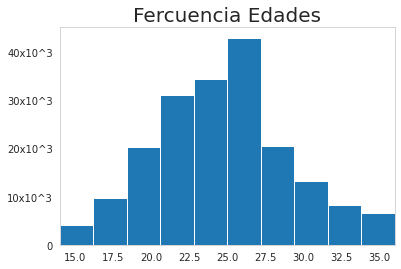

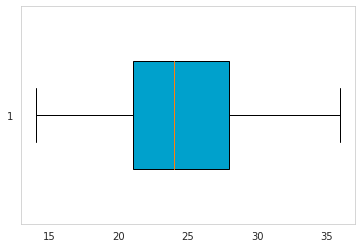

In [97]:
def lblFormat(n, pos):
    if (n==0):
        return str(int(n*10))
    elif (n!=0):
        return str((int(n / 1e3)))+"x10^3"

plt.xlim(min(edad),max(edad))
plt.gca().yaxis.set_major_formatter(lblFormat)

f = plt.figure(1)
plt.hist(edad)
plt.title("Fercuencia Edades", fontsize = 20)
plt.grid(alpha=0.5)

g = plt.figure(2)
plt.boxplot(edad, vert = False,
            widths = 0.5, patch_artist = True, 
            boxprops = dict(color="black", facecolor = "#00a1cc"))

plt.grid(alpha=1)
plt.show()

In [98]:
def lblFormat(n, pos):
    if (n==0):
        return str(int(n*10))
    elif (n!=0):
        return str((int(n / 1e3)))+"x10^3"

plt.xlim(min(edad),max(edad))
plt.gca().yaxis.set_major_formatter(lblFormat)

f = plt.figure(1)
plt.hist(edad,bins=bins)
plt.xticks(bins)
plt.title("Fercuencia Edades", fontsize = 18)
plt.grid(alpha=0.5)

ValueError: `bins` must increase monotonically, when an array

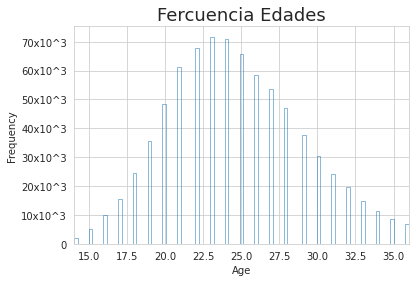

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def lblFormat(n, pos):
    if (n==0):
        return str(int(n*10))
    elif (n!=0):
        return str((int(n / 1e3)))+"x10^3"
edad = data["Age"]
plt.xlim(min(edad),max(edad))
plt.gca().yaxis.set_major_formatter(lblFormat)
sns.set_style("whitegrid")
sns_plot = sns.histplot(data = data, x = "Age", fill=False, stat="frequency")
plt.title("Fercuencia Edades", fontsize = 18)
plt.show()

fig = sns_plot.get_figure()
fig.savefig("output.png")

In [7]:
lista = []
for a in data["Age"]:
    if not pd.isna(a):
        if int(a) > 18 & int(a) < 60:
            lista.append(a)

df = pd.cut( lista, bins = bins)
print(df.value_counts())

max(df.value_counts)


(10.0, 18.0]      8655
(18.0, 24.0]    110474
(24.0, 30.0]     88401
(30.0, 36.0]     28226
(36.0, 42.0]      7999
(42.0, 48.0]      3304
(48.0, 54.0]      1445
(54.0, 60.0]       563
(60.0, 66.0]       331
(66.0, 72.0]       195
(72.0, 97.0]        44
dtype: int64


In [8]:
for i in range(10,100,5):
    print(i,",",end="")

10 ,15 ,20 ,25 ,30 ,35 ,40 ,45 ,50 ,55 ,60 ,65 ,70 ,75 ,80 ,85 ,90 ,95 ,

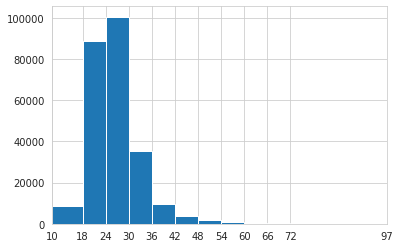

In [9]:
df = data[["Age","Height"]]
edades = pd.DataFrame( data = {'Age': lista} )

plt.hist(edades, bins = bins )
plt.xlim(18,60)
plt.xticks(bins)
plt.show()

In [10]:
for i in range(18,66,6):
    print(i,",",end="")

18 ,24 ,30 ,36 ,42 ,48 ,54 ,60 ,

Deporte:  SUI
Promedio:  28.39710144927536 

Deporte:  SEN
Promedio:  29.0 

Deporte:  EST
Promedio:  29.735294117647058 

Deporte:  MRI
Promedio:  30.0 

Deporte:  DJI
Promedio:  31.0 

Deporte:  KSA
Promedio:  32.6 

Deporte:  VIE
Promedio:  32.75 

Deporte:  UAE
Promedio:  34.5 

Deporte:  IOA
Promedio:  34.6 

Deporte:  KUW
Promedio:  39.0 



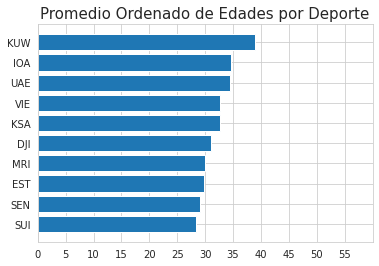

In [92]:
def prnt(df,data):
    for a in list(df.index):
        print("Deporte: ",a)
        print("Promedio: ",data[data["NOC"] == a]["Age"].mean() ,"\n")
    return 0

data = data.dropna()

#Compar edad con deporte con promedio de todas las edades
df = pd.DataFrame(data["NOC"].value_counts())

nombres = []
mean = []

for a in list(df.index):
    # print("Deporte: ",a)
    # print("Promedio: ",data[data["Sport"] == a]["Age"].mean() ,"\n")
    nombres.append(a)
    mean.append(data[data["NOC"] == a]["Age"].mean())

dframe = pd.DataFrame(mean,nombres)
dframe.columns = ["Promedio Edades"]
dframe.sort_values(by = "Promedio Edades", inplace=True, ascending=True)

dframe = dframe.tail(10)
prnt(dframe,data)

plt.barh(list(dframe.index),dframe["Promedio Edades"])
plt.xticks([x for x in range(0,60,5)])

plt.xlim([0,60])
plt.title("Promedio Ordenado de Edades por Deporte", fontsize = 15)
plt.show()


In [91]:
df = pd.DataFrame(data["NOC"].value_counts())

nombres = []
mean = []

for a in list(df.index):
    # print("Deporte: ",a)
    # print("Promedio: ",data[data["Sport"] == a]["Age"].mean() ,"\n")
    nombres.append(a)
    mean.append(data[data["NOC"] == a]["Age"].mean())

dframe = pd.DataFrame(mean,nombres).dropna()
dframe

,0
USA,26.050606
FRA,26.795863
GBR,26.925491
ITA,25.877047
GER,26.823651
...,...
TUV,20.142857
YMD,23.600000
SSD,24.000000
NBO,22.500000


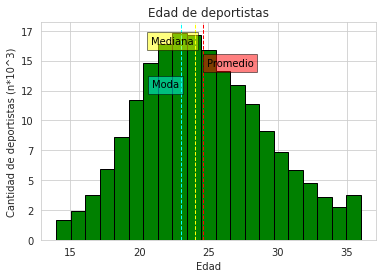

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
import csv
df5 = pd.read_csv("/home/_init_/Documentos/Scripts/GIT/scripts/Data/FCD/datap1.csv",sep=",") 


#Identificamos cuartiles y mediana
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df

#Funcion para cambiar el formato del eje y
def lblFormat(n, pos):
    if (n==0):
        return str(int(n*10))
    elif (n!=0):
        return str((int(n / 1e3)))

df5['Medal'] = df5['Medal'].replace(np.nan,'No Medal')
df5 = df5.dropna()
df5['IMC'] = (df5['Weight']/((df5['Height']/100)*(df5['Height']/100)))
df5 = df5.drop(df5[df5['IMC']<18.5].index)
df5height = remove_outlier(df5,'Age') 

plt.hist(df5height['Age'],21, color="green", ec= "black")

ax = plt.subplot()
plt.axvline(df5height["Age"].median(), color='yellow', linestyle='--', linewidth=1)
plt.axvline(df5height["Age"].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(df5height["Age"].mode().get(0), color='cyan', linestyle='--', linewidth=1)

plt.title('Edad de deportistas')
ax.set_xlabel('Edad')
ax.set_ylabel('Cantidad de deportistas (n*10^3)')

#Añadimos el texto en la linea de la mediana
min_ylim, max_ylim = plt.ylim()
a = plt.text(df5height["Age"].median()*0.87, max_ylim*0.9, 'Mediana'.format(df5height["Age"].median()),color='black')
b = plt.text(df5height["Age"].mean()*1.01, max_ylim*0.8, 'Promedio'.format(df5height["Age"].mean()),color='black')
c = plt.text(df5height["Age"].mode().get(0)*0.91, max_ylim*0.7, 'Moda'.format(df5height["Age"].mean()),color='black')

a.set_bbox(dict(facecolor='yellow', alpha=0.5, edgecolor='black'))
b.set_bbox(dict(facecolor='red', alpha=0.5, edgecolor='black'))
c.set_bbox(dict(facecolor='cyan', alpha=0.5, edgecolor='black'))

#Cambiamos formato de eje y
plt.gca().yaxis.set_major_formatter(lblFormat)
plt.savefig('grafico_sin_outliers.jpg')
plt.show()
plt.close('df5')